In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ema_workbench.analysis import prim

def generate_points(n, m):
    # Generate n x m matrix of random points in [0, 1]
    x = np.random.rand(n, m)
    
    # Generate a vector of n random labels (0 or 1)
    y = np.random.choice([0, 1], n, replace=True)
    
    # Return as a dictionary
    return x, y


/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_d

In [3]:
def calculate_precision_test_data(lims, x_test, y_test):

    is_within_limits = True
    
    # Iterate over each row of temp_data
    # Initialize TP, FP, TN, FN counters
    tp = 0
    fp = 0
    tn = 0
    fn = 0


    # Assuming x_test is a 2D NumPy array and y_test is a 1D NumPy array
    for row_index in range(x_test.shape[0]):
        for col_index in range(x_test.shape[1]):
            element = x_test[row_index, col_index]

            # Check if the element is within the limits for the current column
            is_within_limits = (lims.iloc[0, col_index] <= element <= lims.iloc[1, col_index]) and is_within_limits # Calculate column index
            
        if is_within_limits & (y_test[row_index] == 1):
            tp = tp + 1
        if is_within_limits & (y_test[row_index] == 0):
            fp = fp + 1
        if is_within_limits & (y_test[row_index] == 0):
            tn = tn + 1
        if is_within_limits & (y_test[row_index] == 1):
            fn = fn + 1
        is_within_limits = True
            
                
    if (tp == 0):
        return 0
    else:
        return tp/(tp + fp)

In [8]:
def plot_results(pts, res_train, res_test, plt_name):
    plt.plot(pts, res_train, label='train precision', color='blue')

    # Create a line plot for the second data series (y2) in red
    plt.plot(pts, res_test, label='test precision', color='red')

    # Add labels, a title, and a legend
    plt.xlabel('Number of points test set')
    plt.ylabel('Precision')
    plt.title('Precision of Test vs. Train Data')
    plt.legend()
    
    plt.figure().savefig(plt_name)

    # Show the plot
    return plt

experiment 32/32

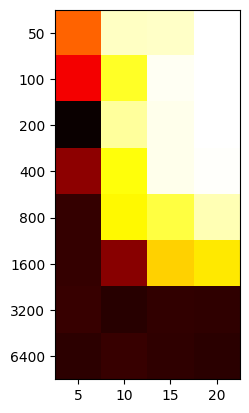

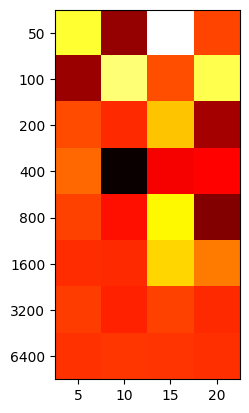

In [18]:
pts = [50, 100, 200, 400, 800, 1600, 3200, 6400]  # number of points to experiment with
atrs = [5, 10, 15, 20]  # number of dimensions to experiment with
res_train = np.empty((len(pts), len(atrs)))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty((len(pts), len(atrs)))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    for m in range(len(atrs)):
        prec_train = []
        prec_test = []
        for i in range(5):  # for each dataset size (n rows, m columns) do five experiments and average the results
            sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)*len(atrs)))
            x, y = generate_points(pts[n], atrs[m])
            x_test, y_test = generate_points(pts[n], atrs[m])
            prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
            box1 = prim_alg.find_box()
            prec_train.append(box1.density)
            prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
        res_train[n, m] = np.mean(prec_train)
        res_test[n, m] = np.mean(prec_test)
        k = k + 1

plt.imshow(res_train, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()

plt.imshow(res_test, cmap='hot')
plt.yticks(np.arange(len(pts)), pts)
plt.xticks(np.arange(len(atrs)), atrs)
plt.show()

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

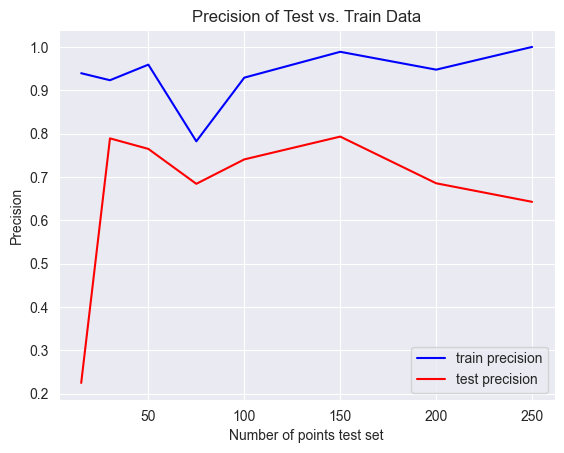

<Figure size 640x480 with 0 Axes>

In [9]:
#precision with different Dataset sizes Rozenberg2014_SSP1
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

prec = []
rec = []

pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(20):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['SSP1'])
        
        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['SSP1']
        temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x = temp_data.values
            
        y_test = sample_test['SSP1']
        temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x_test = temp_data.values
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
plt_name = 'Results_emaWorkbench_Varying_Size_Dimension/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP1.png' 
plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

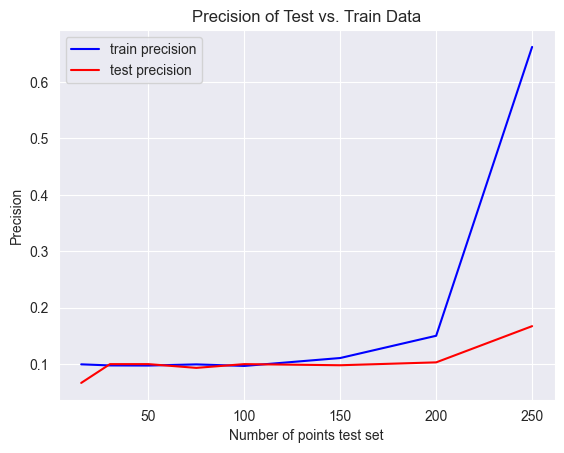

<Figure size 640x480 with 0 Axes>

In [10]:
#precision with different Dataset sizes Rozenberg2014_SSP2
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

prec = []
rec = []

pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['SSP2'])
        
        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['SSP2']
        temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x = temp_data.values
            
        y_test = sample_test['SSP2']
        temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x_test = temp_data.values
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size_Dimension/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP2.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

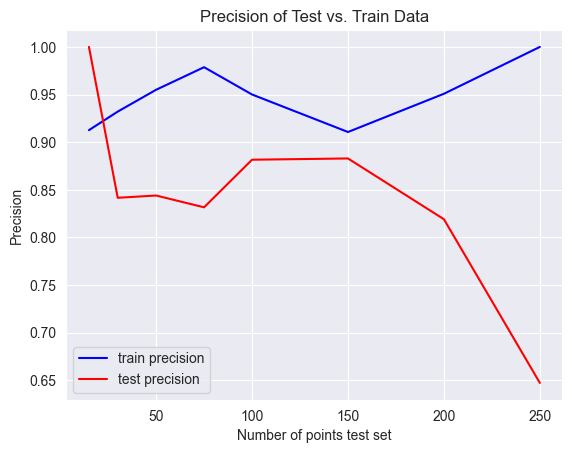

<Figure size 640x480 with 0 Axes>

In [17]:
#precision with different Dataset sizes Rozenberg2014_SSP3
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

prec = []
rec = []

pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(10):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['SSP3'])
        
        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['SSP3']
        temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x = temp_data.values
            
        y_test = sample_test['SSP3']
        temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x_test = temp_data.values
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plt_name = 'Results_emaWorkbench_Varying_Size_Dimension/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP3.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

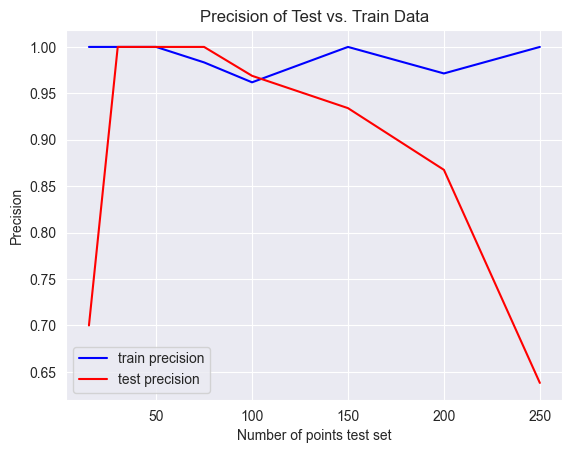

<Figure size 640x480 with 0 Axes>

In [12]:
#precision with different Dataset sizes Rozenberg2014_SSP4
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(10):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['SSP4'])
        
        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['SSP4']
        temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x = temp_data.values
            
        y_test = sample_test['SSP4']
        temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x_test = temp_data.values
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size_Dimension/' + 'Precision_varied_Size_Rozenberg2014_Feature_SSP4.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 6/6

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

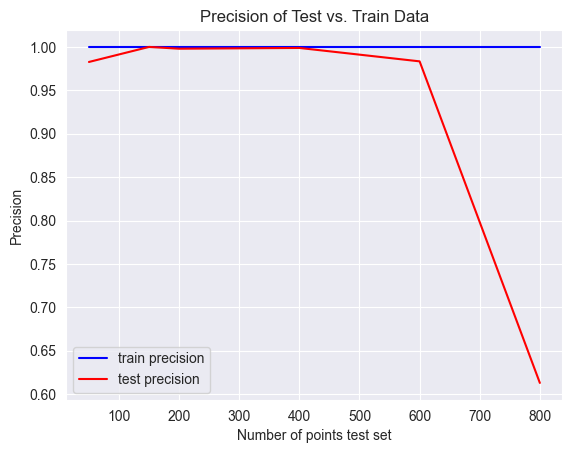

<Figure size 640x480 with 0 Axes>

In [14]:
#precision with different Dataset sizes Bryant2010_GreaterThan90
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Bryant et al 2010.csv')

pts = [50, 150, 200, 400, 600, 800]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['Greater than 90%'])
        
        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['Greater than 90%']
        temp_data = pd.DataFrame(sample_train.drop(columns=['Less than 10%', 'Greater than 90%']))
        x = temp_data.values
            
        y_test = sample_test['Greater than 90%']
        temp_data = pd.DataFrame(sample_test.drop(columns=['Less than 10%', 'Greater than 90%']))
        x_test = temp_data.values
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size_Dimension/' + 'Precision_varied_Size_Bryant2010_Feature_GreaterThan10.png' 
    
plot_results(pts, res_train, res_test, plt_name)

experiment 6/6

<module 'matplotlib.pyplot' from '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/venv/lib/python3.9/site-packages/matplotlib/pyplot.py'>

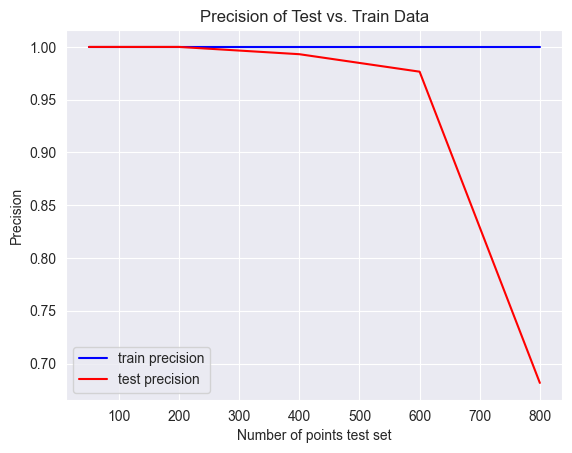

<Figure size 640x480 with 0 Axes>

In [16]:
#precision with different Dataset sizes Bryant2010_LessThan10
data = pd.read_csv('/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Bryant et al 2010.csv')

pts = [50, 150, 200, 400, 600, 800]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(50):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['Less than 10%'])
        
        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['Less than 10%']
        temp_data = pd.DataFrame(sample_train.drop(columns=['Less than 10%', 'Greater than 90%']))
        x = temp_data.values
            
        y_test = sample_test['Less than 10%']
        temp_data = pd.DataFrame(sample_test.drop(columns=['Less than 10%', 'Greater than 90%']))
        x_test = temp_data.values
            
        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))
            
        prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
        box1 = prim_alg.find_box()
        prec_train.append(box1.density)
        prec_test.append(calculate_precision_test_data(box1.box_lims[len(box1.box_lims) - 1], x_test, y_test))           
        
    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1
    
plt_name = 'Results_emaWorkbench_Varying_Size_Dimension/' + 'Precision_varied_Size_Bryant2010_Feature_LessThan10.png' 

plot_results(pts, res_train, res_test, plt_name)

experiment 8/8

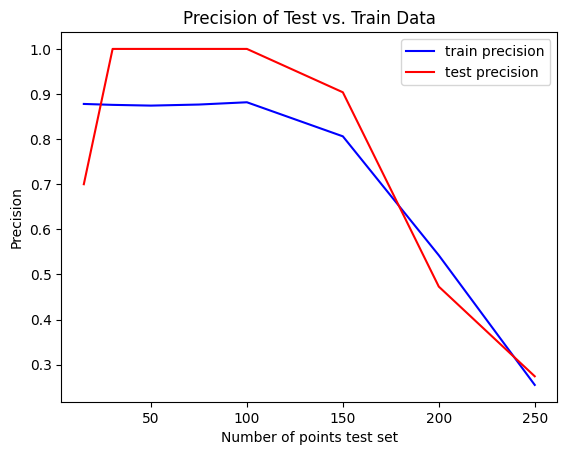

In [46]:
from sklearn.model_selection import train_test_split
import pandas as pd
import prim_dens

data = pd.read_csv(
    '/Users/inagege/Documents/00_Uni/Bachelorarbeit/ImprovingSubgroupDiscovery/Analyzing_Different_Subgroup_Discorvery_Algorithms/Data/Rozenberg et al 2014.csv')

pts = [15, 30, 50, 75, 100, 150, 200, 250]  # number of points to experiment with
res_train = np.empty(len(pts))  # matrix with the results
res_train[:] = np.nan
res_test = np.empty(len(pts))  # matrix with the results
res_test[:] = np.nan
k = 1

for n in range(len(pts)):
    prec_train = []
    prec_test = []
    for i in range(10):  # for each dataset size (n rows, m columns) do five experiments and average the results
        #sampeling a subset of the whole data set
        sample_train, sample_test = train_test_split(data, test_size=pts[n], stratify=data['SSP4'])

        sample_train = pd.DataFrame(data=sample_train.values, columns=sample_train.columns)
        sample_test = pd.DataFrame(data=sample_test.values, columns=sample_test.columns)

        y = sample_train['SSP4']
        temp_data = pd.DataFrame(sample_train.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x = temp_data.values

        y_test = sample_test['SSP4']
        temp_data = pd.DataFrame(sample_test.drop(columns=['SSP1', 'SSP2', 'SSP3', 'SSP4', 'SSP5']))
        x_test = temp_data.values

        sys.stdout.write('\r' + 'experiment' + ' ' + str(k) + '/' + str(len(pts)))

        prim_alg = prim_dens.PRIMdens(x, y, alpha=0.1)
        prim_alg.fit()
        precisions = prim_alg.get_precisions()
        if len(precisions) <= 0:
            prec_train.append(0)
        else:
            prec_train.append(precisions[len(precisions)-1])
        boxes = prim_alg.get_boxes()
        if len(boxes) <= 0:
            prec_test.append(0)
        else:
            box = boxes[len(boxes) - 1]
            box = pd.DataFrame(box)
            prec_test.append(calculate_precision_test_data(box, x_test, y_test))

    res_train[n] = np.mean(prec_train)
    res_test[n] = np.mean(prec_test)
    k = k + 1

plot_results(pts, res_train, res_test)
